# **Tarefa Base**

## **1. Resumo**

O projeto consiste na criação de um algoritmo que recebe o caminho para um vídeo de uma rodovia e retorna o número de veículos que passaram por lá. 

Para isso, a aboragem utilizada foi de detecção e rastreamento (*detection* e *tracking*), através de algoritmos e técnicas de visão computacional. 

Como resultados, foram obtidos o número de veículos que passaram pela rodovia, o tempo de execução do algoritmo e o vídeo com os veículos detectados.

## **2. Metodologia e Desenvolvimento**

### *2.1. Dataset*

O conjunto de dados utilizado conta com uma gravação de duas rodovias vistas de um ponto fixo e alto. O vídeo tem 33:30 de duração e está divido em 67 vídeos no formato mp4 de 30 segundos cada. Os vídeos estão nomeados de 'road_video001' até 'road_video067'. As rodovias estão em sentidos opostos e possuem 3 faixas cada. Na rodovia da esquerda os veículos se afastam da câmera e na da direita os veículos se aproximam.

Esse repositório contém apenas os 5 primeiros vídeos.

<center><img src="./media/road_video001.gif" width="640" height="360" /></center>

<center><i>Exemplo de road_video001</i></center>

### *2.2. Algoritmo*

Inicialmente foram testadas outras duas abordagens para o problema, mas ambas foram descartadas:
1. Utilizando o YOLOv8 combinado com o algoritmo DeepSORT: foi descartada por problemas de compatibilidade entre as bibliotecas utilizadas. Para essa combinação seria necessário utilizar o YOLOv4 e versão muito antigas de diversas bibliotecas.
2. Utilizando a biblioteca *supervision*, criada por um criador de conteúdo de visão computacional, que serve como uma interface para o YOLOv8 e outros algoritmos de detecção e tracking, facilitando a implementação: apesar de facilitar a implementação, a biblioteca acaba limitando as possibilidades de customização do algoritmo.

O algoritmo de detecção e tracking escolhido para essa tarefa foi o **YOLOv8**. 

O YOLO, que significa *You Only Look Once*, é um sistema de detecção de objetos. Diferentemente de métodos tradicionais que realizam a detecção de objetos em várias etapas, o YOLO faz isso em uma única passagem. Ele divide a imagem recebida em uma grade e cada célula dessa grade é responsável por prever objetos. O YOLO utiliza uma rede neural convolucional (CNN) para analisar e classificar os objetos em cada célula e prever caixas delimitadoras (*bounding boxes*) e classes para cada objeto detectado. Dessa forma, ele se torna uma abordagem muito rápida e eficiente para detecção de objetos.

Além da detecção, o YOLOv8 conta com algoritmos de tracking, que são responsáveis por rastrear os objetos detectados.  Nativamente, o YOLOv8 possui 2 algoritmos de tracking:
- *ByteTrack*: utiliza de *features* extraídas pela rede neural do YOLO para reconhecer um mesmo objeto em diferentes frames.
- *BoT-SORT*: utiliza do algoritmo SORT (Simple Online and Realtime Tracking) que é baseado no filtro de Kalman para predizer a posição do objeto no próximo frame.

Cada veículo identificado e rastreado recebe um ID único, permitindo que seja feita a contagem de veículos que passaram pela rodovia.
Outra abordagem de contagem implementada na solução permite que sejam delimitados dois pontos na imagem. 
Os veículos detectados que passarem pela linha formada pelos pontos são contabilizados.

### *2.3. Métricas*

As métricas utilizadas para avaliar o desempenho do algoritmo foram:
- **FPS**: número médio de frames processados por segundo.
- **Tempo de execução**: tempo total de execução do algoritmo.
- **Número de veículos**: número de veículos identificados.

## **3. Resultados e Discussões**

O código cria uma cópia do vídeo passado, mostrando as *bounding boxes*, IDs, a linha de contagem e a quantidade de veículos detectados. Além disso, durante sua execução, o mesmo vídeo que será salvo é mostrado em tempo real. Como o algoritmo é capaz de processar mais frames por segundo do que o vídeo possui (nesse caso 25 FPS) o vídeo mostrado em tempo real aparenta estar acelerado.

Os resultados completos podem ser vistos na pasta outputs. Abaixo está um exemplo de resultado:

<center><img src="./media/road_video001_output.gif" width="640" height="360" /></center>

<center><i>Exemplo de output de road_video001</i></center>

<center><img src="./media/road_video001_output_linha.gif" width="640" height="360" /></center>

<center><i>Exemplo de output com linha de road_video001</i></center>

Foram realizadas 3 execuções do algoritmo para cada um dos vídeos presentes no corte do dataset escolhido. Os resultados obtidos podem ser visualizados nos gráficos abaixo:

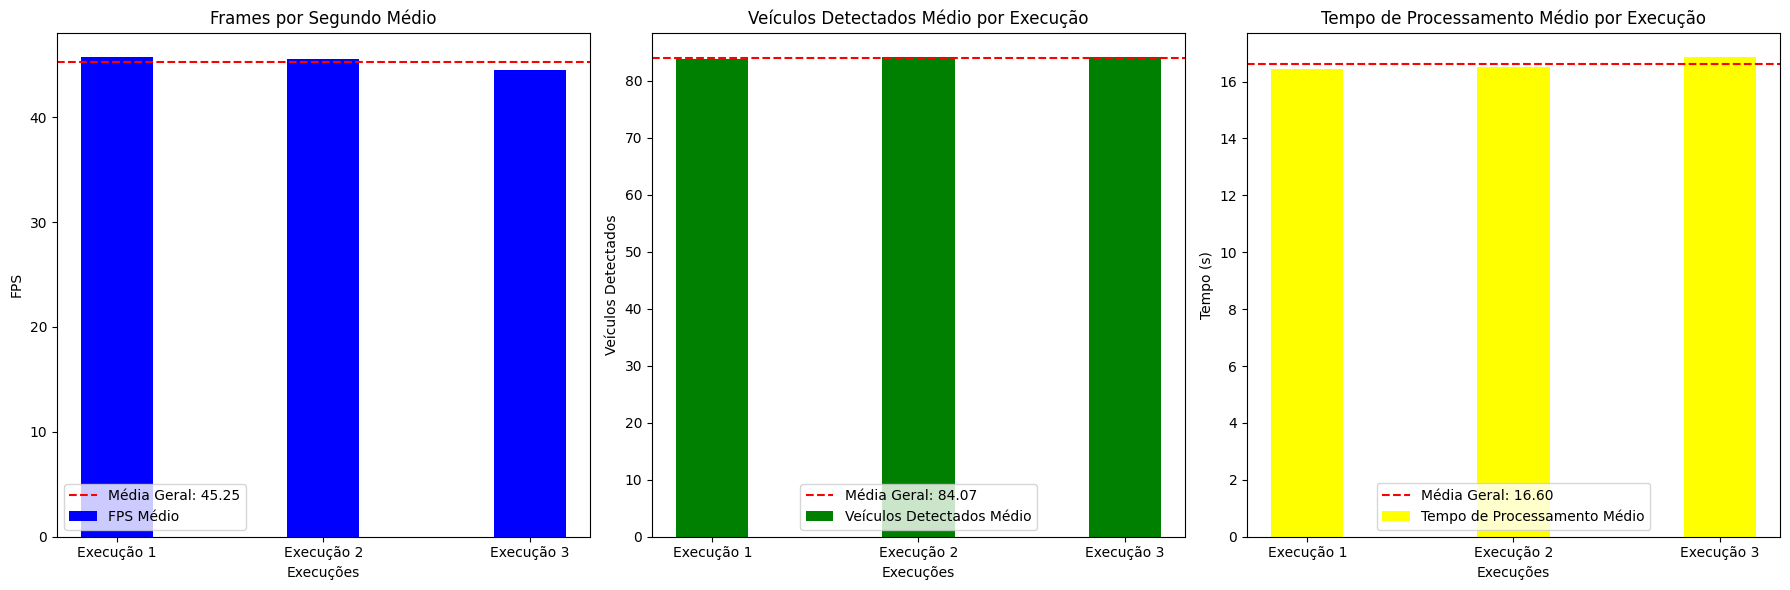
<center><i>Resultado das execuções com contagem global</i></center>

<br>
<br>
<br>

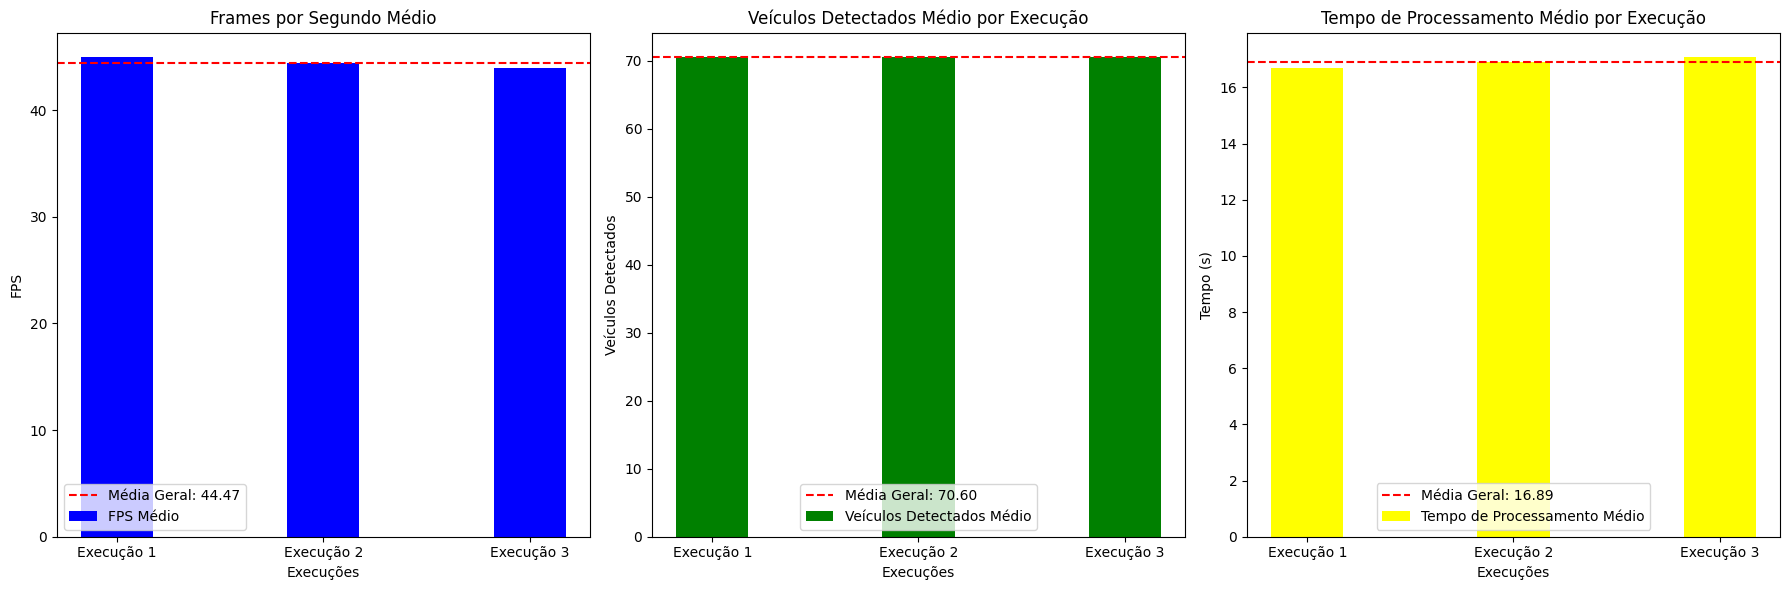
<center><i>Resultado das execuções com contagem com linha</i></center>
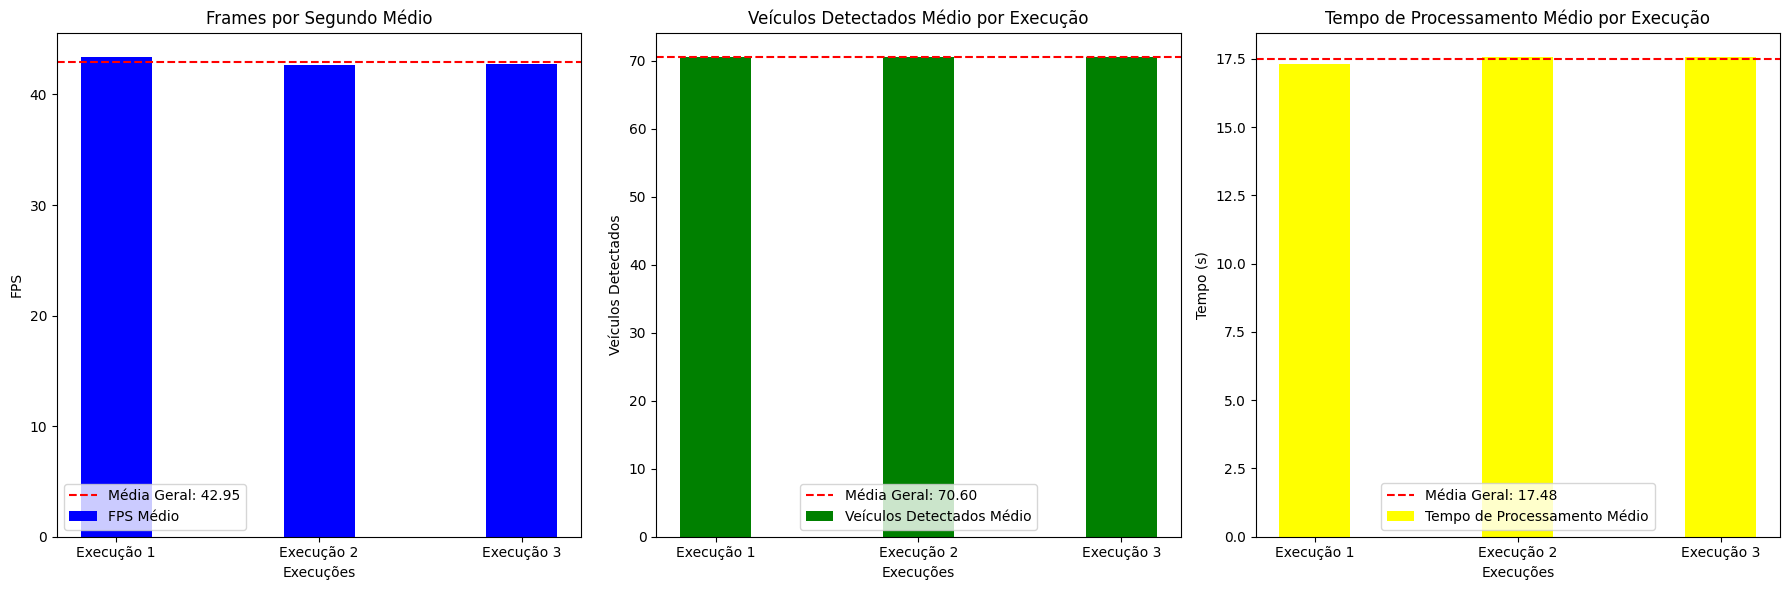
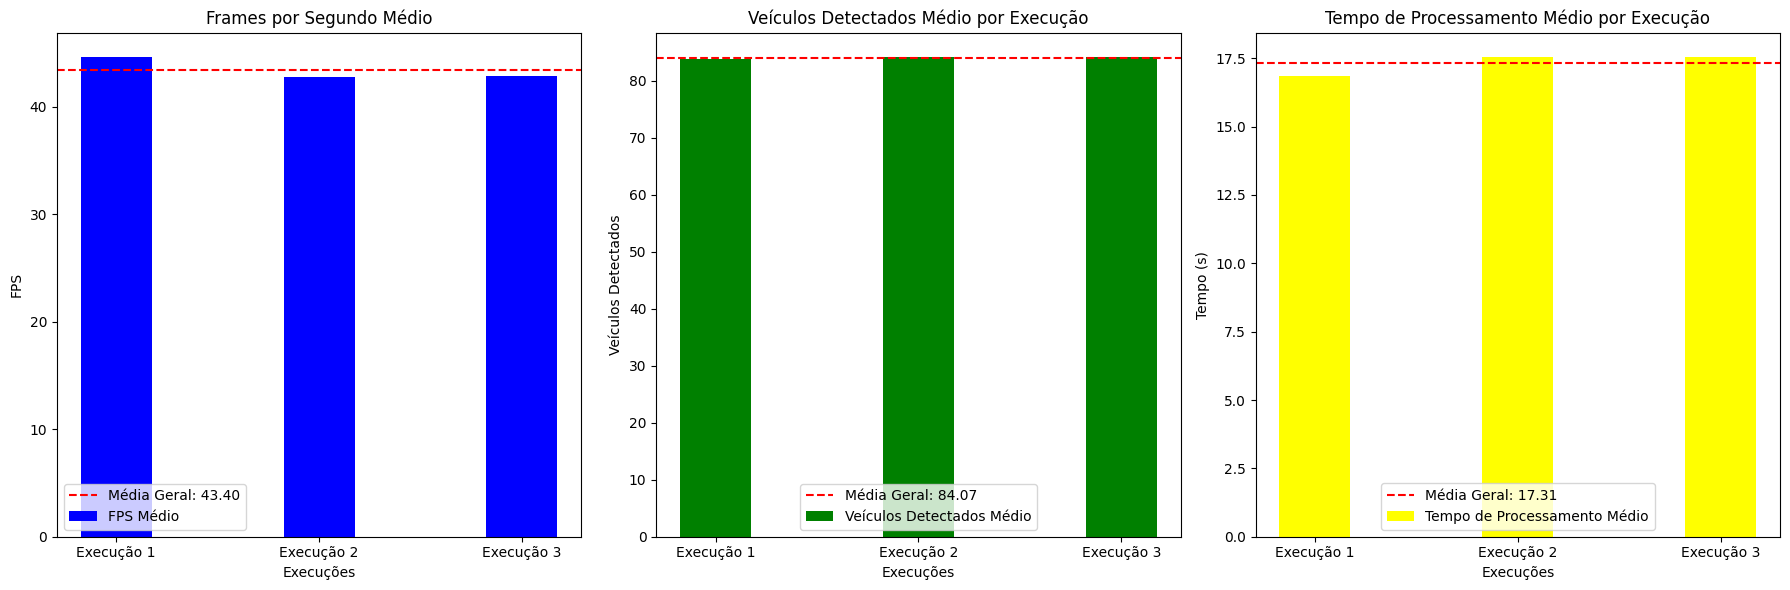

Como é possível visualizar nos gráficos, o algoritmo apresentou um bom desempenho, com uma média de aproximadamente 45 frames processados por segundo. Isso significa que o algoritmo consegue processar mais frames por segundo do que o vídeo possui (25 FPS), nesse caso sendo quase o dobro. Para os vídeos do dataset, que possuem 30 segundos cada, a média de execução do processamento foi de pouco mais de 17 segundos.

Na contagem de veículos, considerando apenas a metade debaixo dos vídeos, o algoritmo identificou e contou corretamente todos os veículos na contagem global. Da metade para cima dos vídeos, os veículos perdem muito a resolução e ficam muito pequenos, o que dificulta a detecção e tracking.

A contagem com linha também apresentou bons resultados, mas identificou menos veículos do que a contagem global (aproximadamente 14 em média). Isso pode se dar pelo fato de que quando eles estão pertos da câmera, onde a linha do teste se encontrava, eles ficavam muito angulados e mudavam rapidamente de ângulo, o que dificultava a detecção.

## **4. Conclusão**

Em geral, o algoritmo apresentou um bom desempenho. Ele é muito rápido e consegue identificar e contar grande parte dos veículos no vídeo.

Além disso, se mostrou bem consistente, visto que há pouca variação entre as métricas das diferentes execuções.

Possíveis melhorias incluem:
- Treinar um modelo específico para o reconhecimento de veículos, pois o modelo utilizado foi treinado para reconhecer 80 classes diferentes de objetos.
- Utilizar um modelo de tracking diferente, como o DeepSORT, que é uma versão melhorada do SORT.

# **Tarefa Bônus**

A tarefa bônus consiste em calcular a velocidade média dos carros para cada faixa da rodovia.

Através da fórmula da velocidade média (v = d/t), pode-se calcular a velocidade média de um veículo. Para isso, é necessário medir o tempo que o veículo levou para percorrer uma distância na rodovia. 

Como não se sabe o tamanho real da rodovia, pode ser utilizado tamanho de referência a largura das faixas, que tendem a ser padronizadas. Pelo vídeo é possível perceber que os motoristas estão do lado esquerdo do carro quando vistos de frente, e em conjunto com o fato de que os veículos possuem as placas traseiras na cor amarela e as dianteiras na cor branca, é possível inferir que o vídeo foi gravado no Reino Unido. Uma rápida pesquisa na internet mostra que a largura das faixas de rodovias no Reino Unido é de 3,65 metros. 

As linhas tracejadas que definem os limites das faixas costumam ser pintadas de forma que os traços estejam alinhados. Sabendo então que na imagem esse segmento mede 3,65m, podemos calcular que cada pixel equivale a aproxidadamente 0,018784m. Definindo então um ponto de início e um ponto final, respeitando o ângulo da faixa, podemos traçar o segmento que será utilizado como a distância no cálculo da velocidade média. Basta medir o tempo que o veículo leva para percorrer esse segmento e calcular a velocidade média. Com a velocidade média de todos os veículos, pode-se calcular a velocidade média da faixa.

<center><img src="./media/distancia.png" width=700px /></center>
<center><i>Esquema com os cálculos e linhas de referência</i></center>